## What is the pandas?

**Pandas** is a library providing high-performance, easy-to-use ***data structures*** and ***data analysis tools*** for the Python programming language

http://pandas.pydata.org/pandas-docs/stable/overview.html

---
## Pandas basics

In [2]:
## Load pandas and numpy modules
import pandas as pd
import numpy as np

#### Data structures at a glance

* **Series** : 1D labeled homogeneously-typed array
* **DataFrame** : General 2D labeled, size-mutable tabular structure with potentially heterogeneously-typed columns
* **Panel** : General 3D labeled, also size-mutable array

### Creating objects

#### *Series*

In [3]:
s = pd.Series(np.random.randn(5), index=['a', 'b', 'c', 'd', 'e']) # from a 1D numpy.ndarray
s

a   -0.221034
b   -0.009437
c    0.306066
d    0.631024
e   -0.417031
dtype: float64

In [4]:
s = pd.Series(["A+","B-","C0","A0"], name="Grade") # from a Python list
s

0    A+
1    B-
2    C0
3    A0
Name: Grade, dtype: object

In [3]:
## To see the help for a function or a method, type `func_name?` or `meth_name?`
np.random.randn?

#### *DataFrame*

In [6]:
## From a dict of Series or dicts
d = {'one' : pd.Series([1., 2., 3.], index=['a', 'b', 'c']),
     'two' : pd.Series([1., 2., 3., 4.], index=['a', 'b', 'c', 'd'])}

df = pd.DataFrame(d)
df

,one,two
a,1.0,1.0
b,2.0,2.0
c,3.0,3.0
d,NaN,4.0


In [7]:
## From dict of ndarrays / lists; the sizes of ndarrays / lists should match
d = {'one' : [1., 2., 3., 4.],
     'two' : [4., 3., 2., 1.]}

df = pd.DataFrame(d)
df

,one,two
0,1.0,4.0
1,2.0,3.0
2,3.0,2.0
3,4.0,1.0


In [8]:
## From a list of dicts
l = [{'a': 1, 'b': 2}, {'a': 5, 'b': 10, 'c': 20}]

df = pd.DataFrame(l)
df

,a,b,c
0,1,2,NaN
1,5,10,20.0


#### *Panel*

In [9]:
## From dict of DataFrame objects
d = {'Item1' : pd.DataFrame(np.random.randn(4, 3)),
     'Item2' : pd.DataFrame(np.random.randn(4, 2))}
pn = pd.Panel(d)
pn

<class 'pandas.core.panel.Panel'>
Dimensions: 2 (items) x 4 (major_axis) x 3 (minor_axis)
Items axis: Item1 to Item2
Major_axis axis: 0 to 3
Minor_axis axis: 0 to 2

### Reading a table

In [10]:
inpfPath = "gdp_growth_from_the_world_bank.csv"
df = pd.read_table(inpfPath, sep=",", skiprows=4)
df.head(3)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,Unnamed: 61
0,Aruba,ABW,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,-6.881302,-5.653502,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,3.611368,21.020649,8.433290,6.113685,14.434741,1.959123,1.312531,0.840719,NaN,NaN
2,Angola,AGO,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,13.817146,2.412870,3.407655,3.918597,5.155441,6.813586,4.804473,3.006981,NaN,NaN


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 62 columns):
Country Name      264 non-null object
Country Code      264 non-null object
Indicator Name    264 non-null object
Indicator Code    264 non-null object
1960              0 non-null float64
1961              122 non-null float64
1962              124 non-null float64
1963              124 non-null float64
1964              124 non-null float64
1965              124 non-null float64
1966              134 non-null float64
1967              138 non-null float64
1968              139 non-null float64
1969              143 non-null float64
1970              143 non-null float64
1971              157 non-null float64
1972              157 non-null float64
1973              157 non-null float64
1974              157 non-null float64
1975              158 non-null float64
1976              163 non-null float64
1977              164 non-null float64
1978              169 non-null float64
1979

In [12]:
## Clean up the table by removing unnecessary columns

to_drop = ["1960", "2016", "Unnamed: 61"]
if to_drop[0] in df.columns: df.drop(to_drop, axis=1, inplace=True) # Be cautious when using `inplace`

### Indexing / Selection

In [13]:
## Get a glimpse of the DataFrame using head or tail methods
df.head(3)

,Country Name,Country Code,Indicator Name,Indicator Code,1961,1962,1963,1964,1965,1966,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Aruba,ABW,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,2.355119,-3.654626,-6.881302,-5.653502,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,5.554138,13.740205,3.611368,21.020649,8.433290,6.113685,14.434741,1.959123,1.312531,0.840719
2,Angola,AGO,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,20.735125,22.593054,13.817146,2.412870,3.407655,3.918597,5.155441,6.813586,4.804473,3.006981


In [14]:
## Selection by positions
## df.iloc[ i , j ], where i = row position, j = column position
print(df.iloc[1, 0] )
print()
print(df.iloc[1, -5:]) # slicing also can be done by using a colon(:)

Afghanistan

2011     6.11369
2012     14.4347
2013     1.95912
2014     1.31253
2015    0.840719
Name: 1, dtype: object


In [15]:
## Setting a column as an index col
df_gdp = df.set_index("Country Name")

## Check if there are duplicates in the indices
df_gdp.index.duplicated().sum()

df_gdp.head(3)

,Country Code,Indicator Name,Indicator Code,1961,1962,1963,1964,1965,1966,1967,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country Name,,,,,,,,,,,,,,,,,,,,,
Aruba,ABW,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.355119,-3.654626,-6.881302,-5.653502,NaN,NaN,NaN,NaN,NaN,NaN
Afghanistan,AFG,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.554138,13.740205,3.611368,21.020649,8.433290,6.113685,14.434741,1.959123,1.312531,0.840719
Angola,AGO,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,20.735125,22.593054,13.817146,2.412870,3.407655,3.918597,5.155441,6.813586,4.804473,3.006981


In [16]:
## Selection by index values
print(df_gdp.loc["Korea, Rep."].tail(10))
print()
print(df_gdp.loc["Japan"].tail(10))
print()
print(df_gdp.loc["China"].tail(10))

2006     5.17613
2007     5.46341
2008     2.82921
2009    0.707518
2010     6.49679
2011      3.6817
2012     2.29238
2013     2.89622
2014     3.34145
2015     2.61194
Name: Korea, Rep., dtype: object

2006     1.41998
2007     1.65428
2008    -1.09348
2009    -5.41712
2010     4.19229
2011   -0.115462
2012     1.49503
2013     2.00049
2014    0.335665
2015     1.21944
Name: Japan, dtype: object

2006    12.7195
2007    14.2314
2008    9.65429
2009    9.39981
2010    10.6361
2011    9.53644
2012    7.85626
2013    7.75764
2014    7.29767
2015    6.91834
Name: China, dtype: object


In [17]:
df_gdp.loc[["Korea, Rep.", "Japan", "China"]].iloc[:,-10:]

,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country Name,,,,,,,,,,
"Korea, Rep.",5.176134,5.463406,2.829214,0.707518,6.496794,3.681696,2.292382,2.896220,3.341448,2.611935
Japan,1.419984,1.654283,-1.093479,-5.417120,4.192289,-0.115462,1.495029,2.000490,0.335665,1.219438
China,12.719479,14.231388,9.654289,9.399813,10.636140,9.536443,7.856262,7.757635,7.297666,6.918336


In [18]:
df_gdp.loc[["Korea, Rep.", "Japan", "China"], "Country Code"]

Country Name
Korea, Rep.    KOR
Japan          JPN
China          CHN
Name: Country Code, dtype: object

### Conditional selection

In [30]:
## Average GDP growth of recent years
df_recent = df_gdp.iloc[:,-5:].mean(axis=1)
df_gdp[df_recent > 10].index

Index(['Ethiopia', 'Mongolia', 'Nauru', 'Turkmenistan'], dtype='object', name='Country Name')

### Joining tables

In [117]:
## We are trying to group the countries by regions
df_cc = pd.read_csv("country_codes.csv")
df_cc.head(3)

,name,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region,region-code,sub-region-code
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,142.0,34.0
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,150.0,154.0
2,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,150.0,39.0


In [218]:
cols_to_add = ["region", "sub-region"]
df_merged = df_gdp.join( df_cc.set_index("alpha-3")[cols_to_add], on="Country Code")
df_merged.head(3)

## Read the docstring of pd.DataFrame.join method
## See also pd.merge?

,Country Code,Indicator Name,Indicator Code,1961,1962,1963,1964,1965,1966,1967,...,2008,2009,2010,2011,2012,2013,2014,2015,region,sub-region
Country Name,,,,,,,,,,,,,,,,,,,,,
Aruba,ABW,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-6.881302,-5.653502,NaN,NaN,NaN,NaN,NaN,NaN,Americas,Caribbean
Afghanistan,AFG,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.611368,21.020649,8.433290,6.113685,14.434741,1.959123,1.312531,0.840719,Asia,Southern Asia
Angola,AGO,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,13.817146,2.412870,3.407655,3.918597,5.155441,6.813586,4.804473,3.006981,Africa,Middle Africa


In [229]:
## Rearranging the order of columns (optional)
cols = list(df_gdp.columns)
new_cols = cols[:3] + cols_to_add + cols[3:]
df_merged = df_merged[new_cols]
df_merged.head(3)

,Country Code,Indicator Name,Indicator Code,region,sub-region,1961,1962,1963,1964,1965,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country Name,,,,,,,,,,,,,,,,,,,,,
Aruba,ABW,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,Americas,Caribbean,NaN,NaN,NaN,NaN,NaN,...,2.355119,-3.654626,-6.881302,-5.653502,NaN,NaN,NaN,NaN,NaN,NaN
Afghanistan,AFG,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,Asia,Southern Asia,NaN,NaN,NaN,NaN,NaN,...,5.554138,13.740205,3.611368,21.020649,8.433290,6.113685,14.434741,1.959123,1.312531,0.840719
Angola,AGO,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,Africa,Middle Africa,NaN,NaN,NaN,NaN,NaN,...,20.735125,22.593054,13.817146,2.412870,3.407655,3.918597,5.155441,6.813586,4.804473,3.006981


### Grouping rows by the values of a certain column (or columns)

In [237]:
groups = df_merged.groupby("region")
groups.size() # shows the number of members for each group

region
Africa      54
Americas    46
Asia        50
Europe      46
Oceania     19
dtype: int64

In [238]:
## Aggregate the groups by a given function, np.mean in this case.

df_regavg = groups.agg(np.mean)
df_regavg # Note that inapplicable columns are omitted from the results

,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
region,,,,,,,,,,,,,,,,,,,,,
Africa,1.996844,4.317391,4.404625,4.665741,4.876310,3.391943,3.477996,4.579369,5.431533,6.851628,...,5.922204,5.956775,4.724275,3.050974,5.252843,3.294183,4.216965,4.434433,4.480188,2.818253
Americas,5.030197,5.901709,3.878282,6.810284,5.187757,5.711716,4.414142,4.525251,5.315149,5.357984,...,5.418746,4.584840,2.921533,-1.897492,2.605204,2.932662,1.960690,2.770267,2.592663,2.278547
Asia,4.346875,6.243738,6.545021,6.536595,6.583270,5.834447,7.129877,11.134461,8.943228,7.345793,...,7.864124,8.260074,5.580465,3.132352,6.893342,6.001843,5.505579,4.508537,3.963402,2.915761
Europe,5.687057,4.826886,5.292762,6.647331,5.015715,4.202914,3.857446,4.192858,6.212075,5.565937,...,5.406606,5.519314,2.371514,-4.876233,2.032343,2.062232,0.106961,1.382774,1.953741,2.370386
Oceania,4.058207,3.769259,5.547912,6.807906,4.516090,2.781390,4.876195,9.312398,6.189991,12.667681,...,0.707128,2.102314,2.735571,-1.449784,3.057776,3.709433,2.630827,3.253178,4.340491,2.947400


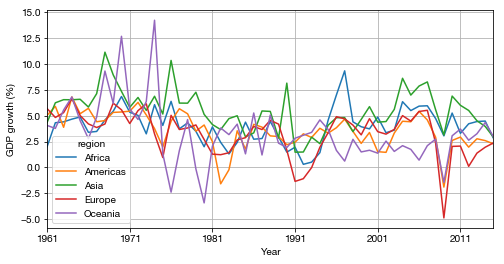

In [239]:
## Draw a figure using matplotlib
from matplotlib import pyplot as plt

ax = df_regavg.T.plot(figsize=[8,4])
ax.set_ylabel("GDP growth (%)")
ax.set_xlabel("Year")
ax.grid(True)

plt.show()

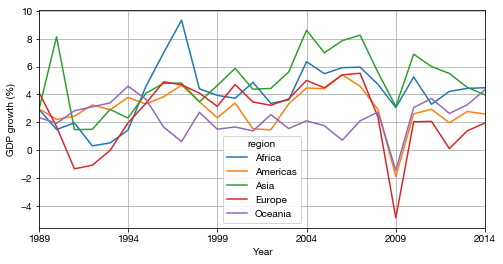

In [249]:
## Focus on a narrower time window
yst, yen = 1989, 2014
years = map(str, range(yst, yen+1, 1))
df_subset = df_regavg.loc[:, years]
ax = df_subset.T.plot(figsize=[8,4])
ax.set_ylabel("GDP growth (%)")
ax.set_xlabel("Year")
ax.grid(True)

plt.show()

In [1]:
## Focus on certain countries
countries = ["Korea, Rep.", "Japan", "China", "Mongolia"]
yst, yen = 1982, 2014
years = map(str, range(yst, yen+1, 1))
ax = df_merged.loc[countries, years].T.plot()
ax.grid(True)
plt.show()


NameError: name 'df_merged' is not defined

### What else can you see from the data?